In [339]:
ethiqueclc = all_data.drop(columns=["Male", "Female", "Divorced","Single", "Married", "Education", "Age"]) 

y_e = ethiqueclc["Attrition"]
X_e = ethiqueclc.drop(columns=["Attrition"])

x_train, x_test, y_train, y_test = train_test_split(X_e, y_e, test_size=0.15, random_state=42, stratify=y_e)

In [340]:
pipeline_decision_tree_classifier = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier())
])

In [341]:
criterion = ['gini', 'entropy']
max_depth = [16,18,20,21,22,23,24]

parameters_dtc = dict(classifier__criterion=criterion,
                  classifier__max_depth=max_depth)


In [342]:
clf_GS = GridSearchCV(pipeline_decision_tree_classifier, parameters_dtc)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [16, 18, 20, 21, 22, 23, 24]})

In [343]:
pd.DataFrame.from_dict(clf_GS.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.036036,0.003007,0.001992,0.000013,entropy,20,"{'classifier__criterion': 'entropy', 'classifi...",0.961333,0.966667,0.956000,0.955941,0.973298,0.962648,0.006640,1
3,0.026919,0.000522,0.001807,0.000387,gini,21,"{'classifier__criterion': 'gini', 'classifier_...",0.956000,0.968000,0.956000,0.963952,0.961282,0.961047,0.004643,2
2,0.026745,0.000849,0.001715,0.000615,gini,20,"{'classifier__criterion': 'gini', 'classifier_...",0.953333,0.972000,0.952000,0.969292,0.957276,0.960780,0.008285,3
8,0.033283,0.001725,0.001916,0.000167,entropy,18,"{'classifier__criterion': 'entropy', 'classifi...",0.958667,0.961333,0.962667,0.954606,0.966622,0.960779,0.004014,4
10,0.032327,0.002907,0.001894,0.000203,entropy,21,"{'classifier__criterion': 'entropy', 'classifi...",0.960000,0.960000,0.958667,0.950601,0.971963,0.960246,0.006825,5
12,0.029129,0.003181,0.001599,0.000493,entropy,23,"{'classifier__criterion': 'entropy', 'classifi...",0.956000,0.960000,0.957333,0.957276,0.966622,0.959446,0.003817,6
11,0.031194,0.001703,0.001994,0.000011,entropy,22,"{'classifier__criterion': 'entropy', 'classifi...",0.960000,0.956000,0.961333,0.961282,0.958611,0.959445,0.001990,7
7,0.031710,0.002247,0.002014,0.000017,entropy,16,"{'classifier__criterion': 'entropy', 'classifi...",0.966667,0.956000,0.953333,0.950601,0.969292,0.959179,0.007432,8
13,0.030900,0.003618,0.002107,0.000809,entropy,24,"{'classifier__criterion': 'entropy', 'classifi...",0.958667,0.968000,0.946667,0.958611,0.962617,0.958912,0.007020,9
6,0.029101,0.001751,0.002009,0.000013,gini,24,"{'classifier__criterion': 'gini', 'classifier_...",0.954667,0.972000,0.948000,0.961282,0.957276,0.958645,0.007954,10


Après plusieurs tests, on ressort qu'une max_depth de 22 et un criterion en entropy est le meilleur model que l'on peu avoir

In [369]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=22)
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(X_e)

### HistGradientBoostingClassifier

In [345]:
pipeline_hist_gradient_boosting_classifier = Pipeline(steps=[
    ('classifier', HistGradientBoostingClassifier())
])

In [372]:
learning_rate = [0.1,0.2]
max_depth = [10,15,20]
#loss = ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy']
max_iter = [10,20,50,100]

parameters_hgbc = dict(classifier__learning_rate=learning_rate,
                  classifier__max_depth=max_depth,
                  #classifier__loss=loss,
                  classifier__max_iter=max_iter
                  )

In [373]:
clf_GS = GridSearchCV(pipeline_hist_gradient_boosting_classifier, parameters_hgbc)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        HistGradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.1, 0.2],
                         'classifier__max_depth': [10, 15, 20],
                         'classifier__max_iter': [10, 20, 50, 100]})

In [348]:
pd.DataFrame.from_dict(clf_GS.cv_results_).sort_values(by=['rank_test_score']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,1.842742,0.004718,0.009408,0.000377,0.2,15,100,"{'classifier__learning_rate': 0.2, 'classifier...",1.000000,1.000000,1.000000,0.998866,0.998866,0.999546,0.000555,1
15,1.809739,0.026511,0.009402,0.000803,0.2,10,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.998866,1.000000,1.000000,0.998866,0.998866,0.999320,0.000555,2
23,2.140493,0.112579,0.013001,0.001264,0.2,20,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.997732,0.998866,1.000000,0.998866,0.998866,0.998866,0.000717,3
7,1.880762,0.041615,0.009904,0.001116,0.1,15,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.996599,0.998866,1.000000,0.997732,0.996599,0.997959,0.001322,4
18,0.939035,0.007447,0.006908,0.000802,0.2,15,50,"{'classifier__learning_rate': 0.2, 'classifier...",0.994331,0.997732,1.000000,0.998866,0.997732,0.997732,0.001897,5
14,0.912879,0.009898,0.007202,0.000399,0.2,10,50,"{'classifier__learning_rate': 0.2, 'classifier...",0.990930,0.997732,1.000000,0.997732,0.998866,0.997052,0.003175,6
22,1.030493,0.043775,0.009106,0.003108,0.2,20,50,"{'classifier__learning_rate': 0.2, 'classifier...",0.994331,0.995465,1.000000,0.997732,0.997732,0.997052,0.001977,6
11,1.857244,0.010676,0.009999,0.000632,0.1,20,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.996599,0.996599,0.998866,0.997732,0.995465,0.997052,0.001156,6
3,1.804087,0.011188,0.009401,0.000798,0.1,10,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.995465,0.997732,0.998866,0.996599,0.996599,0.997052,0.001156,6
10,0.943780,0.007871,0.007200,0.000749,0.1,20,50,"{'classifier__learning_rate': 0.1, 'classifier...",0.979592,0.977324,0.984127,0.976190,0.981859,0.979819,0.002904,10


In [349]:
hgbc = HistGradientBoostingClassifier(learning_rate=0.2, max_depth=20, max_iter=100)
hgbc.fit(x_test, y_test)

y_pred_hgbc = hgbc.predict(x_test)

### RandomForestClassifier

In [350]:
pipeline_random_forest_classifier = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

In [351]:
n_estimators = [1,2,3,5,10]
criterion = ['gini', 'entropy']
max_depth = [10,14,18,22,24]


parameters_rfc = dict(classifier__n_estimators=n_estimators,
                  classifier__criterion=criterion,
                  classifier__max_depth=max_depth
                  )

In [352]:
clf_GS = GridSearchCV(pipeline_random_forest_classifier, parameters_rfc)
clf_GS.fit(x_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 14, 18, 22, 24],
                         'classifier__n_estimators': [1, 2, 3, 5, 10]})

In [353]:
pd.DataFrame.from_dict(clf_GS.cv_results_).sort_values(by=['rank_test_score']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.065028,0.002517,0.003794,0.000398,gini,18,10,"{'classifier__criterion': 'gini', 'classifier_...",0.989796,0.997732,0.994331,0.990930,0.992063,0.992971,0.002814,1
39,0.067654,0.003735,0.003999,0.000025,entropy,18,10,"{'classifier__criterion': 'entropy', 'classifi...",0.992063,0.990930,0.989796,0.993197,0.993197,0.991837,0.001322,2
44,0.070978,0.006142,0.003813,0.000408,entropy,22,10,"{'classifier__criterion': 'entropy', 'classifi...",0.992063,0.992063,0.995465,0.992063,0.985261,0.991383,0.003333,3
24,0.062648,0.002216,0.003200,0.000398,gini,24,10,"{'classifier__criterion': 'gini', 'classifier_...",0.990930,0.993197,0.992063,0.988662,0.989796,0.990930,0.001603,4
19,0.069400,0.002783,0.004000,0.000004,gini,22,10,"{'classifier__criterion': 'gini', 'classifier_...",0.990930,0.987528,0.990930,0.995465,0.986395,0.990249,0.003175,5
43,0.033532,0.001098,0.002795,0.000397,entropy,22,5,"{'classifier__criterion': 'entropy', 'classifi...",0.988662,0.989796,0.989796,0.990930,0.986395,0.989116,0.001538,6
49,0.072698,0.004022,0.003401,0.000492,entropy,24,10,"{'classifier__criterion': 'entropy', 'classifi...",0.989796,0.989796,0.989796,0.990930,0.985261,0.989116,0.001977,6
23,0.037217,0.001114,0.002801,0.000401,gini,24,5,"{'classifier__criterion': 'gini', 'classifier_...",0.981859,0.989796,0.980726,0.994331,0.994331,0.988209,0.005896,8
13,0.037145,0.003883,0.003208,0.000396,gini,18,5,"{'classifier__criterion': 'gini', 'classifier_...",0.984127,0.984127,0.988662,0.988662,0.989796,0.987075,0.002442,9
48,0.036028,0.000924,0.002422,0.000500,entropy,24,5,"{'classifier__criterion': 'entropy', 'classifi...",0.992063,0.986395,0.978458,0.990930,0.981859,0.985941,0.005201,10


In [354]:
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=24)
rfc.fit(x_test, y_test)

y_pred_rdc = rfc.predict(x_test)

### Perceptron

In [355]:
pipeline_Perceptron = Pipeline(steps=[
    ('classifier', Perceptron())
])

In [356]:
penalty = ['l2','l1','elasticnet']
alpha = [0.0001,0.0002,0.0003]


parameters_pe = dict(classifier__penalty=penalty,
                  classifier__alpha=alpha)

In [357]:
clf_GS = GridSearchCV(pipeline_Perceptron, parameters_pe)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier', Perceptron())]),
             param_grid={'classifier__alpha': [0.0001, 0.0002, 0.0003],
                         'classifier__penalty': ['l2', 'l1', 'elasticnet']})

In [358]:
pd.DataFrame.from_dict(clf_GS.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006999,0.001099,0.002488,0.000911,0.0001,l2,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
1,0.008931,0.001449,0.001944,0.000046,0.0001,l1,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
2,0.008995,0.000896,0.001746,0.000383,0.0001,elasticnet,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
3,0.005717,0.000993,0.001972,0.000026,0.0002,l2,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
4,0.009412,0.001029,0.001381,0.000444,0.0002,l1,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
5,0.008814,0.001330,0.002201,0.000386,0.0002,elasticnet,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
6,0.005010,0.000623,0.001783,0.000407,0.0003,l2,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
7,0.008905,0.001304,0.001983,0.000015,0.0003,l1,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
8,0.009426,0.000794,0.002089,0.000231,0.0003,elasticnet,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1


In [359]:
pe = Perceptron(penalty='l2', alpha=0.0001)
pe.fit(x_test, y_test)

y_pred_pe = pe.predict(x_test)

### Logistic Regression

In [360]:
pipeline_LogisticRegression = Pipeline(steps=[
    ('classifier', LogisticRegression())
])

In [361]:
penalty = ['l2']
max_iter = [200,300,400,500,600,700,800,900,1000]



parameters_lr = dict(classifier__penalty = penalty, classifier__max_iter = max_iter)

In [362]:
clf_GS = GridSearchCV(pipeline_LogisticRegression, parameters_lr)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid={'classifier__max_iter': [200, 300, 400, 500, 600, 700,
                                                  800, 900, 1000],
                         'classifier__penalty': ['l2']})

In [363]:
pd.DataFrame.from_dict(clf_GS.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_iter,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076587,0.029223,0.002308,0.000398,200,l2,"{'classifier__max_iter': 200, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
1,0.072272,0.027642,0.001800,0.000401,300,l2,"{'classifier__max_iter': 300, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
2,0.085773,0.036688,0.002010,0.000011,400,l2,"{'classifier__max_iter': 400, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
3,0.072685,0.026536,0.001799,0.000400,500,l2,"{'classifier__max_iter': 500, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
4,0.080945,0.029356,0.002105,0.000207,600,l2,"{'classifier__max_iter': 600, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
5,0.076220,0.027546,0.002002,0.000015,700,l2,"{'classifier__max_iter': 700, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
6,0.077305,0.027733,0.002006,0.000014,800,l2,"{'classifier__max_iter': 800, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
7,0.077719,0.030853,0.001809,0.000393,900,l2,"{'classifier__max_iter': 900, 'classifier__pen...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1
8,0.073871,0.026838,0.002201,0.000400,1000,l2,"{'classifier__max_iter': 1000, 'classifier__pe...",0.841333,0.844,0.838667,0.843792,0.850467,0.843652,0.00392,1


In [364]:
lr = LogisticRegression(penalty='l2', max_iter=200)
lr.fit(x_test, y_test)

y_pred_lr = lr.predict(x_test)

# Analyse des résultats

ValueError: Found input variables with inconsistent numbers of samples: [662, 4410]

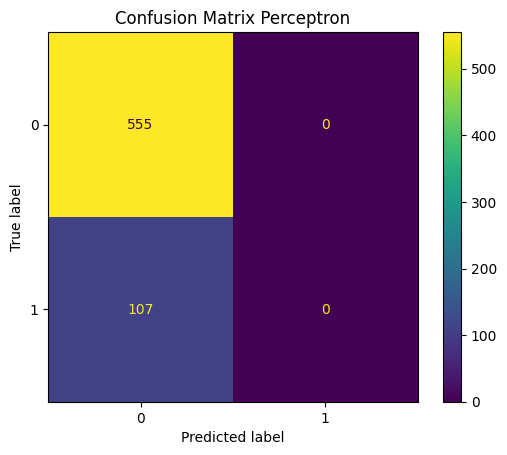

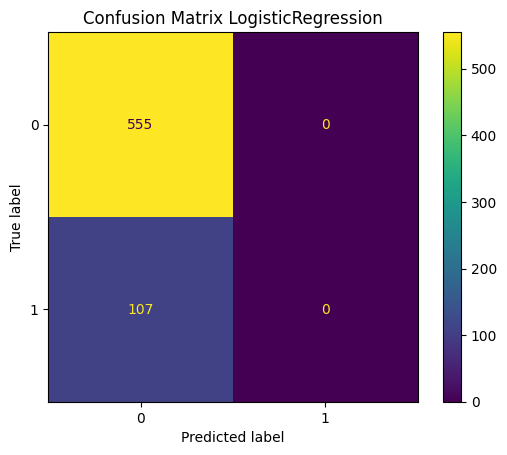

In [374]:
y_pred_list = {
    "Perceptron": y_pred_pe,
    "LogisticRegression": y_pred_lr,
    "DecisionTreeClassifier": y_pred_dtc,
    "RandomForestClassifier": y_pred_rdc,
    "HistGradientBoostingClassifier": y_pred_hgbc
}

def cmdPlot(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=[0,1])
    cmd.plot()
    plt.title(title)


for y_pred in y_pred_list:
    cmdPlot(y_test, y_pred_list[y_pred], "Confusion Matrix " + y_pred) 

plt.show()

# Conclusion
<div id="cc"></div>

On remarque que l'étude sur le fait de se sentir bien ou non a un fort impact sur les démissions
On remarque aussi que le nombre d'heure travaillée a aussi un certain impacte sur les démissions